# SIFT 실습

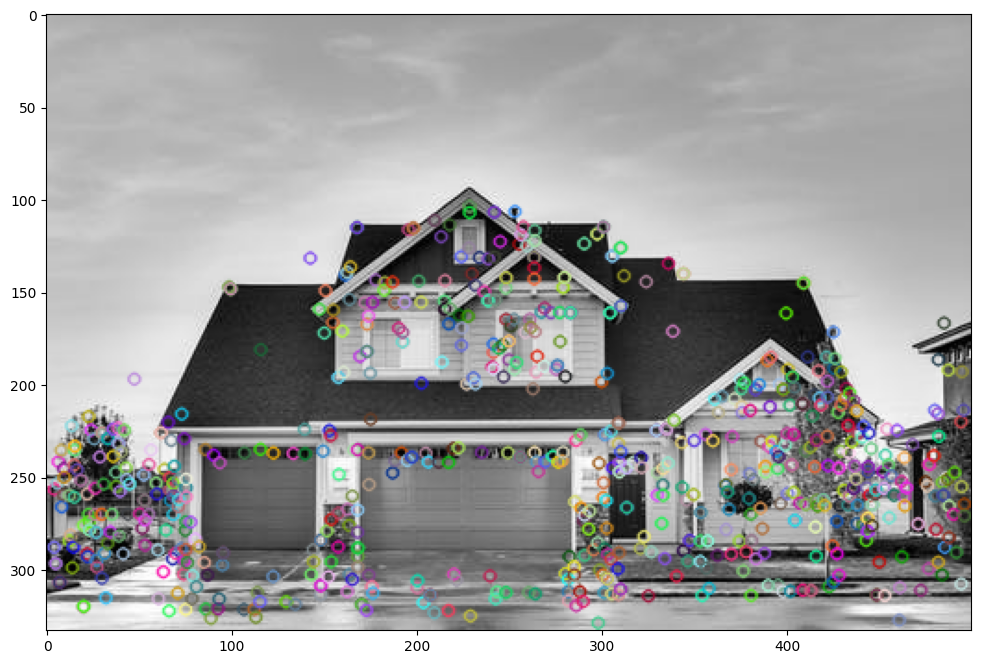

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread("../chapter_2/Chapter_2.0/data/house.jpeg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray, None)
img = cv.drawKeypoints(gray, kp, img)

plt.figure(figsize=(15,8))
plt.imshow(img)

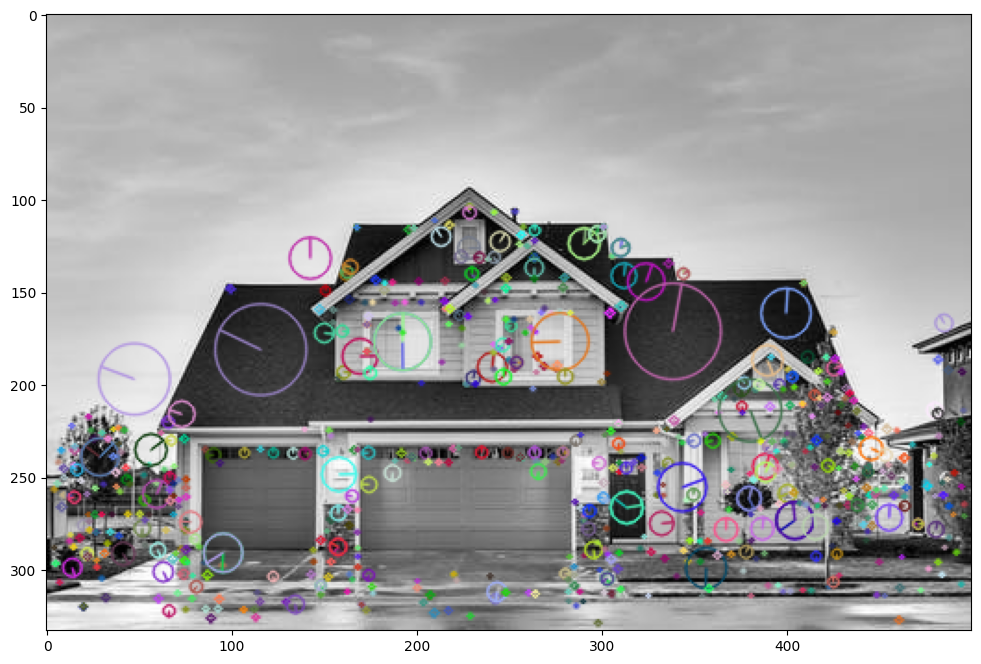

In [22]:
img = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imwrite('sift_keypoints.jpg', img)
plt.figure(figsize=(15,8))
plt.imshow(img)

In [23]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

print("angle: {:.2f} \n octave: {:.2f} \n coordinates: ({:.2f} {:.2f}) \n response: {:.2f} \n size: {:.2f}".format(kp[0].angle, kp[0].octave, kp[0].pt[0], kp[0].pt[1], kp[0].response, kp[0].size))

kp = np.array([i.pt for i in kp])
print(kp.shape)
print(des.shape)

angle: 357.10 
 octave: 2294271.00 
 coordinates: (3.84 287.84) 
 response: 0.07 
 size: 1.85
(740, 2)
(740, 128)


# Using Kornia library

In [24]:
import torch
import kornia
import kornia.feature as KF
from torchvision import transforms
from PIL import Image

filename = '../chapter_2/Chapter_2.0/data/house.jpeg'

tensor = transforms.ToTensor()(Image.open(filename).convert('L')).unsqueeze(0)

print(tensor.shape)

torch.Size([1, 1, 333, 500])


In [25]:
sift = KF.SIFTFeature(num_features=2000)

print(sift)

local_affine, confidence_score, descriptor = sift(tensor)

print(local_affine.shape, confidence_score.shape, descriptor.shape)

SIFTFeature(
  (detector): MultiResolutionDetector(
    (model): BlobDoGSingle, sigma1=1.0, sigma2=1.6)
    (nms): NonMaximaSuppression2d()
    (ori): LAFOrienter(patch_size=19, angle_detector=PatchDominantGradientOrientation(patch_size=19, num_ang_bins=36, eps=1e-08))
    (aff): PassLAF()
  )
  (descriptor): LAFDescriptor(descriptor=SIFTDescriptor(num_ang_bins=8, num_spatial_bins=4, patch_size=41, rootsift=True, clipval=0.2), patch_size=41, grayscale_descriptor='True)
)
torch.Size([1, 1919, 2, 3]) torch.Size([1, 1919]) torch.Size([1, 1919, 128])


# SIFT descriptor only (using patch input)

In [26]:
input = torch.rand(23, 1, 32, 32)
SIFT = KF.SIFTDescriptor(32, 8 ,4)
descs = SIFT(input) # 23x128

# Dense SIFT descriptor! (Without keypoint detection)

In [27]:
input = torch.rand(2, 1, 200, 300)
SIFT = KF.DenseSIFTDescriptor()
descs = SIFT(input) # 2x128x194x294

print(descs.shape)

torch.Size([2, 128, 200, 300])


In [28]:
SIFT

DenseSIFTDescriptor(num_ang_bins=8, num_spatial_bins=4, spatial_bin_size=4, rootsift=True, stride=1, clipval=0.2)